### Note 

This is the first part of the assignment for Module 4 of Unsupervised Algorithms in Machine Learning.

More information can be found on: https://github.com/minhleathvn/machine-learnin-theory-and-hands-on-practice-with-pythong-cu

In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/learn-ai-bbc/BBC News Train.csv
/kaggle/input/learn-ai-bbc/BBC News Sample Solution.csv
/kaggle/input/learn-ai-bbc/BBC News Test.csv


In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Step 1: EDA & Feature Extraction - PLAN
### Initial Data Exploration:

* Load the BBC News Train.csv and BBC News Test.csv files into pandas DataFrames.

* Use .info(), .describe(), and check for missing values with .isna().sum().

* Crucially, analyze the category distribution in the training set using train_df['Category'].value_counts(). Visualize this with a bar plot to see if the classes are balanced. This is a key piece of EDA.

* Explore the text itself. Create new columns for article length (number of characters or words) and visualize their distributions with histograms to spot any outliers.

### Text Cleaning: This is a critical step for any NLP task. Create a preprocessing function that:

* Converts all text to lowercase.

* Removes punctuation, numbers, and special characters.

* Removes common English "stop words" (e.g., "the", "a", "an"). We may utilize the standard list from libraries like NLTK or sklearn.

### Feature Extraction (Word Embedding):

* Start with TF-IDF: For this project, TfidfVectorizer from sklearn is an excellent choice. It's effective and a standard tool for text classification. TF-IDF (Term Frequency-Inverse Document Frequency) gives a high score to words that appear frequently in one article but rarely in all other articles, making them good indicators of the topic.   

* Consider to try some advanced methods like Word2Vec or GloVe, but mainly focusing on TF-IDF, that well will be sufficient.

### Explore the data

In [36]:
# Import data
BBC_news_train = pd.read_csv('/kaggle/input/learn-ai-bbc/BBC News Train.csv')
BBC_news_test = pd.read_csv('/kaggle/input/learn-ai-bbc/BBC News Test.csv')

print(BBC_news_train.head(10))
print(BBC_news_test.head(10))

   ArticleId                                               Text       Category
0       1833  worldcom ex-boss launches defence lawyers defe...       business
1        154  german business confidence slides german busin...       business
2       1101  bbc poll indicates economic gloom citizens in ...       business
3       1976  lifestyle  governs mobile choice  faster  bett...           tech
4        917  enron bosses in $168m payout eighteen former e...       business
5       1582  howard  truanted to play snooker  conservative...       politics
6        651  wales silent on grand slam talk rhys williams ...          sport
7       1797  french honour for director parker british film...  entertainment
8       2034  car giant hit by mercedes slump a slump in pro...       business
9       1866  fockers fuel festive film chart comedy meet th...  entertainment
   ArticleId                                               Text
0       1018  qpr keeper day heads for preston queens park r...
1  

In [37]:
print(BBC_news_train.describe())
print(BBC_news_train.info())

         ArticleId
count  1490.000000
mean   1119.696644
std     641.826283
min       2.000000
25%     565.250000
50%    1112.500000
75%    1680.750000
max    2224.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB
None


In [38]:
print(BBC_news_train.isnull().sum())
print(BBC_news_train.isna().sum())

ArticleId    0
Text         0
Category     0
dtype: int64
ArticleId    0
Text         0
Category     0
dtype: int64


In [39]:
print("Training dataframe's shape is", BBC_news_train.shape)
print("Unique values of 'Category':", pd.unique(BBC_news_train.Category))

Training dataframe's shape is (1490, 3)
Unique values of 'Category': ['business' 'tech' 'politics' 'sport' 'entertainment']


Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64


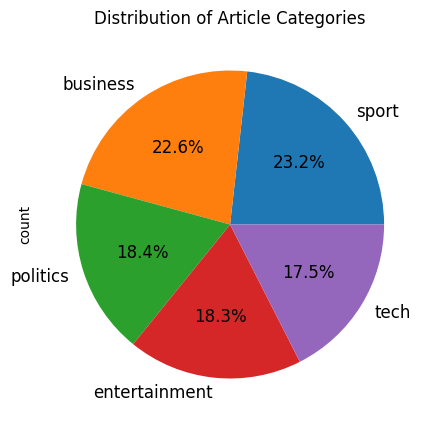

In [40]:
BBC_news_train_cat = BBC_news_train.Category.value_counts()
print(BBC_news_train_cat)
dist_pie = BBC_news_train_cat.plot(kind='pie', figsize=(5, 5), title="Distribution of Article Categories", autopct='%.1f%%', fontsize=12)

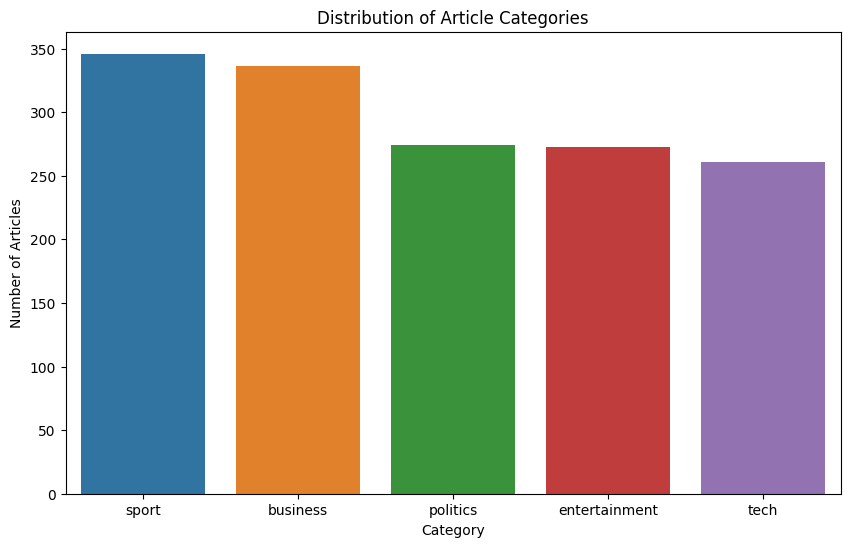

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x=BBC_news_train_cat.index, y=BBC_news_train_cat.values)
plt.title("Distribution of Article Categories")
plt.xlabel("Category")
plt.ylabel("Number of Articles")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


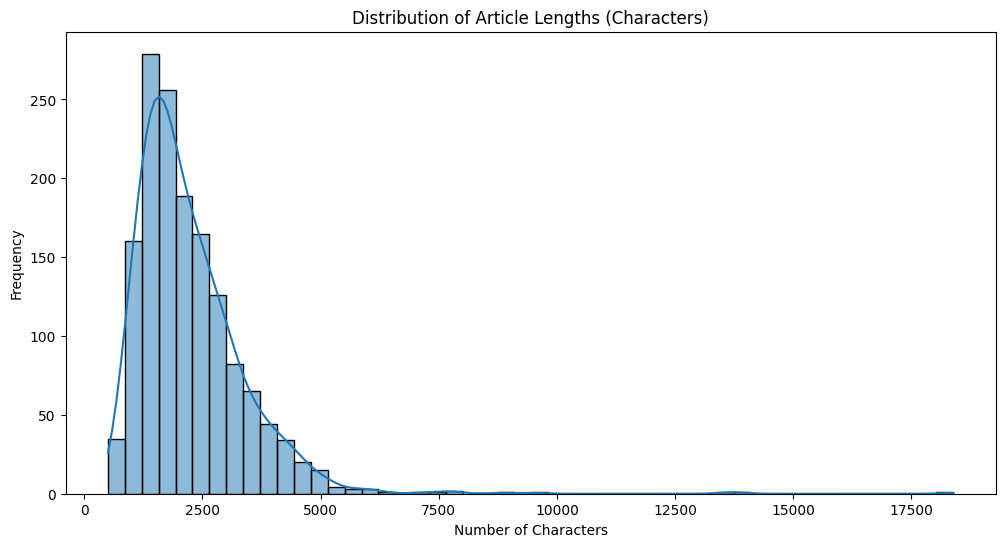

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


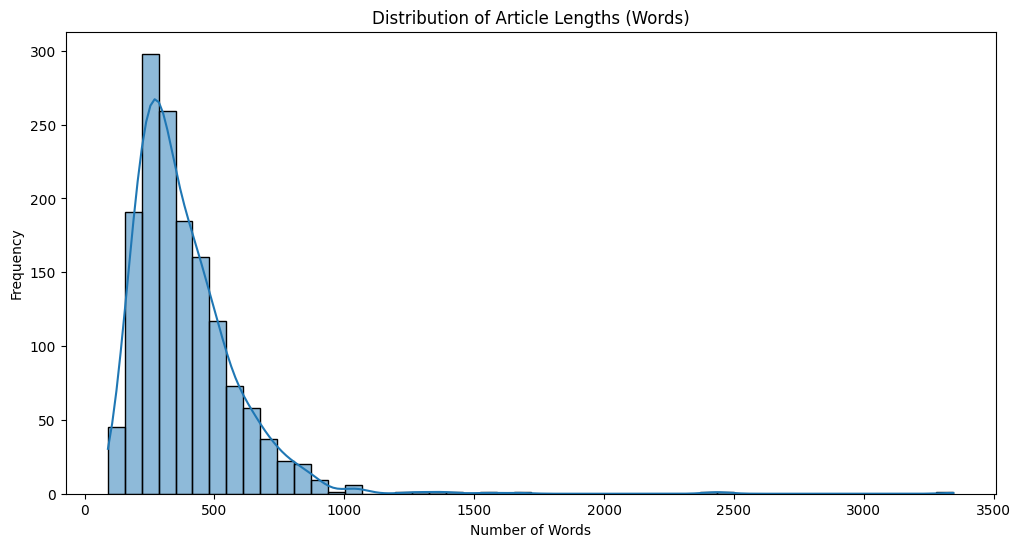

In [42]:
BBC_news_train['Text_Length_Char'] = BBC_news_train['Text'].apply(len)
BBC_news_train['Text_Length_Words'] = BBC_news_train['Text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 6))
sns.histplot(BBC_news_train['Text_Length_Char'], bins=50, kde=True)
plt.title("Distribution of Article Lengths (Characters)")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(BBC_news_train['Text_Length_Words'], bins=50, kde=True)
plt.title("Distribution of Article Lengths (Words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

### Clean data text

In [43]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [44]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation, numbers, special characters
    words = word_tokenize(text) # Tokenize into words
    words = [word for word in words if word not in stop_words] # Remove stopwords
    return ' '.join(words)

In [45]:
BBC_news_train['Clean_Text'] = BBC_news_train['Text'].apply(preprocess_text)
BBC_news_test['Clean_Text'] = BBC_news_test['Text'].apply(preprocess_text)

print(BBC_news_train[['Text', 'Clean_Text']].head())

                                                Text  \
0  worldcom ex-boss launches defence lawyers defe...   
1  german business confidence slides german busin...   
2  bbc poll indicates economic gloom citizens in ...   
3  lifestyle  governs mobile choice  faster  bett...   
4  enron bosses in $168m payout eighteen former e...   

                                          Clean_Text  
0  worldcom exboss launches defence lawyers defen...  
1  german business confidence slides german busin...  
2  bbc poll indicates economic gloom citizens maj...  
3  lifestyle governs mobile choice faster better ...  
4  enron bosses payout eighteen former enron dire...  


### Now we can extract features..

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
# Combine text for TF-IDF (for unsupervised model later)
combined_text = pd.concat([BBC_news_train['Clean_Text'], BBC_news_test['Clean_Text']], axis=0)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix_combined = tfidf_vectorizer.fit_transform(combined_text)

# If we need separate matrices for train and test (e.g., for supervised learning later)
tfidf_matrix_train = tfidf_vectorizer.transform(BBC_news_train['Clean_Text'])
tfidf_matrix_test = tfidf_vectorizer.transform(BBC_news_test['Clean_Text'])

print("Shape of TF-IDF matrix for combined text:", tfidf_matrix_combined.shape)
print("Shape of TF-IDF matrix for training text:", tfidf_matrix_train.shape)
print("Shape of TF-IDF matrix for testing text:", tfidf_matrix_test.shape)

Shape of TF-IDF matrix for combined text: (2225, 5000)
Shape of TF-IDF matrix for training text: (1490, 5000)
Shape of TF-IDF matrix for testing text: (735, 5000)


## Step 2: Unsupervised Model Building - IDEA and PLAN
### The Big Question: Should we include text from the test dataset?

The anwser is Yes. For an unsupervised approach like topic modeling, we should. The goal of the model (NMF) is to learn the underlying topics from the entire collection of documents we have. By fitting our TfidfVectorizer and NMF on the combined text of both the training and test sets, the model gets a more complete picture of the vocabulary and document structures, leading to better-defined topics. We are not using the test labels, only the text.

### Building the NMF Model:

* Combine the 'Text' column from our training and test data.

* Apply TfidfVectorizer to this combined text to get our document-term matrix. We can limit the number of features with the max_features parameter (e.g., max_features=2000).   

* Use sklearn.decomposition.NMF with n_components=5 (since there are 5 news categories).

* This will give we a document-topic matrix (W) and a topic-word matrix (H).

### Mapping Topics to Labels & Prediction:

* The NMF model will output topics 0, 1, 2, 3, 4. We need to figure out which topic corresponds to 'sports', 'tech', etc.

* A good way to do this is to create a mapping. For each learned topic, find out which true category is most frequent among the training documents assigned to that topic.

* Once we have this mapping, we can generate predictions for all our data and submit the test predictions to Kaggle to get our accuracy.

### Hyperparameter Tuning:

* The most impactful hyperparameter will likely be max_features in our TfidfVectorizer.

* Create a simple table or a plot showing how the Kaggle accuracy changes as we vary max_features (e.g., trying values like 1000, 2000, 5000).

In [48]:
import itertools
from sklearn.metrics import accuracy_score

def label_permute_compare(ytdf, yp, n=5):
    """
    ytdf: labels dataframe object
    yp: clustering label prediction output
    Returns permuted label order and accuracy. 
    Example output: (3, 4, 1, 2, 0), 0.74 
    """
    # your code here
    best_accu = -1
    best_perm = None
    
    true_labels_raw = ytdf.iloc[:, 0].values if isinstance(ytdf, pd.DataFrame) else ytdf
    
    unique_true_labels_str = np.unique(true_labels_raw)
    unique_true_labels_str.sort()
    true_label_to_num = {name: i for i, name in enumerate(unique_true_labels_str)}
    true_labels_numerical = np.array([true_label_to_num[name] for name in true_labels_raw])
    
    original_predicted_labels_unique = np.unique(yp)
    if len(original_predicted_labels_unique) != n:        
        raise ValueError(f'Number of unique labels does not match!!')
        
    for perm in itertools.permutations(range(n)):
        mapping = {original_predicted_labels_unique[i]: perm[i] for i in range(n)}
        permuted_yp = np.array([mapping[l] for l in yp])
        current_accu = accuracy_score(true_labels_numerical, permuted_yp)
        
        if current_accu > best_accu:
            best_accu = current_accu
            best_perm = perm
            
    return best_perm, best_accu

### How does the model look like??
We may utilize the helper function in Week2 Lab

In [49]:
from sklearn.decomposition import NMF

# Define the number of topics (equal to the number of categories)
n_components = 5

# Initialize the NMF model
nmf_model = NMF(n_components=n_components, random_state=42, init='nndsvd', max_iter=200)

# Fit the NMF model to our combined TF-IDF matrix
W = nmf_model.fit_transform(tfidf_matrix_combined) # Document-topic matrix
H = nmf_model.components_ # Topic-word matrix

print("Shape of Document-Topic Matrix (W):", W.shape)
print("Shape of Topic-Word Matrix (H):", H.shape)

Shape of Document-Topic Matrix (W): (2225, 5)
Shape of Topic-Word Matrix (H): (5, 5000)


### Do mapping..

In [50]:
feature_names = tfidf_vectorizer.get_feature_names_out()

print("\nTop words for each NMF topic:")
for topic_idx, topic in enumerate(H):
    top_words_idx = topic.argsort()[:-10 - 1:-1] # Get indices of top 10 words
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic {topic_idx}: {', '.join(top_words)}")


Top words for each NMF topic:
Topic 0: england, game, win, wales, cup, ireland, said, play, side, players
Topic 1: mr, labour, blair, election, brown, party, said, government, would, howard
Topic 2: bn, growth, said, us, economy, year, sales, bank, oil, economic
Topic 3: film, best, awards, award, festival, actor, actress, films, oscar, director
Topic 4: people, mobile, music, said, technology, digital, phone, users, broadband, software


In [51]:
dominant_topic = W.argmax(axis=1)

# First, separate the dominant topics for training and test data
dominant_topic_train = dominant_topic[:len(BBC_news_train)]
dominant_topic_test = dominant_topic[len(BBC_news_train):]

# Create a mapping from NMF topic to actual category
topic_to_category = {}
for i in range(n_components):
    # Find all training articles assigned to this NMF topic
    articles_in_topic = BBC_news_train[dominant_topic_train == i]
    if not articles_in_topic.empty:
        # Determine the most frequent actual category for these articles
        most_common_category = articles_in_topic['Category'].mode()[0]
        topic_to_category[i] = most_common_category
    else:
        topic_to_category[i] = "unassigned" # Fallback if a topic has no training examples

print("\nNMF Topic to Category Mapping:")
print(topic_to_category)

# Apply the mapping to get predicted categories for training and test sets
predicted_categories_train = pd.Series(dominant_topic_train).map(topic_to_category)
predicted_categories_test = pd.Series(dominant_topic_test).map(topic_to_category)

print("\nPredicted Categories for first 5 training articles:")
print(predicted_categories_train.head())
print("\nPredicted Categories for first 5 testing articles (will be submitted to Kaggle):")
print(predicted_categories_test.head())

best_perm, accuracy = label_permute_compare(BBC_news_train['Category'], predicted_categories_train, n=5)
print(f"\nBest permutation: {best_perm}")
print(f"Accuracy: {accuracy}")


NMF Topic to Category Mapping:
{0: 'sport', 1: 'politics', 2: 'business', 3: 'entertainment', 4: 'tech'}

Predicted Categories for first 5 training articles:
0    business
1    business
2    business
3        tech
4    business
dtype: object

Predicted Categories for first 5 testing articles (will be submitted to Kaggle):
0       sport
1        tech
2       sport
3    business
4       sport
dtype: object

Best permutation: (0, 1, 2, 3, 4)
Accuracy: 0.9248322147651007


In [52]:
# Assuming BBC_news_test has the 'ArticleId' column
submission_df = pd.DataFrame({'ArticleId': BBC_news_test['ArticleId'], 'Category': predicted_categories_test})
submission_df.to_csv('submission.csv', index=False)

print("\nSubmission file created: submission.csv")
print(submission_df.head())


Submission file created: submission.csv
   ArticleId  Category
0       1018     sport
1       1319      tech
2       1138     sport
3        459  business
4       1020     sport


### Fine tuning the hyperparameter

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Define the number of topics (equal to the number of categories)
n_components = 5

# List of max_features values to try
max_features_to_try = [1000, 2000, 5000, 7500, 10000]

results = {} # To store results if we want to print them later

for mf in max_features_to_try:
    print(f"\n--- Running NMF with max_features = {mf} ---")

    # 1. TF-IDF Vectorization
    tfidf_vectorizer = TfidfVectorizer(max_features=mf)
    tfidf_matrix_combined = tfidf_vectorizer.fit_transform(combined_text) # 'combined_text' from previous step

    # Separate matrices for train and test for later use if needed,
    # though for this specific NMF approach, we're fitting on combined.
    tfidf_matrix_train = tfidf_vectorizer.transform(BBC_news_train['Clean_Text'])
    tfidf_matrix_test = tfidf_vectorizer.transform(BBC_news_test['Clean_Text'])


    # 2. Building the NMF Model
    nmf_model = NMF(n_components=n_components, random_state=42, init='nndsvd', max_iter=200)
    W = nmf_model.fit_transform(tfidf_matrix_combined) # Document-topic matrix


    # 3. Mapping Topics to Labels & Prediction
    dominant_topic = W.argmax(axis=1)

    # Separate dominant topics for training and test data
    dominant_topic_train = dominant_topic[:len(BBC_news_train)]
    dominant_topic_test = dominant_topic[len(BBC_news_train):]

    # Create a mapping from NMF topic to actual category using training data
    topic_to_category = {}
    for i in range(n_components):
        articles_in_topic = BBC_news_train[dominant_topic_train == i]
        if not articles_in_topic.empty:
            most_common_category = articles_in_topic['Category'].mode()[0]
            topic_to_category[i] = most_common_category
        else:
            topic_to_category[i] = "unassigned" # Fallback

    print(f"NMF Topic to Category Mapping for max_features={mf}:")
    print(topic_to_category)

    # Apply the mapping to get predicted categories for the test set
    predicted_categories_test = pd.Series(dominant_topic_test).map(topic_to_category)

    # 4. Prepare for Kaggle Submission
    submission_filename = f'submission_nmf_max_features_{mf}.csv'
    submission_df = pd.DataFrame({'ArticleId': BBC_news_test['ArticleId'], 'Category': predicted_categories_test})
    submission_df.to_csv(submission_filename, index=False)

    print(f"Submission file created: {submission_filename}")
    print(submission_df.head())


--- Running NMF with max_features = 1000 ---
NMF Topic to Category Mapping for max_features=1000:
{0: 'business', 1: 'sport', 2: 'politics', 3: 'entertainment', 4: 'tech'}
Submission file created: submission_nmf_max_features_1000.csv
   ArticleId  Category
0       1018     sport
1       1319      tech
2       1138     sport
3        459  business
4       1020     sport

--- Running NMF with max_features = 2000 ---
NMF Topic to Category Mapping for max_features=2000:
{0: 'sport', 1: 'politics', 2: 'business', 3: 'entertainment', 4: 'tech'}
Submission file created: submission_nmf_max_features_2000.csv
   ArticleId  Category
0       1018     sport
1       1319      tech
2       1138     sport
3        459  business
4       1020     sport

--- Running NMF with max_features = 5000 ---
NMF Topic to Category Mapping for max_features=5000:
{0: 'sport', 1: 'politics', 2: 'business', 3: 'entertainment', 4: 'tech'}
Submission file created: submission_nmf_max_features_5000.csv
   ArticleId  Categ

## Step 3: Comparison with Supervised Learning - IDEA
### Pick a Supervised Model:

Logistic Regression and Multinomial Naive Bayes are excellent, simple, and powerful baselines for text classification. They are often very hard to beat.

### Train and Compare:

* Important: For the supervised model, we must only fit our TfidfVectorizer on the training data. Then, use that same fitted vectorizer to .transform() both the training and test data. This prevents data leakage.

* Train our chosen supervised model on the vectorized training data and labels.

* Predict on the test set and compare the Kaggle score with our NMF model. The supervised model will likely perform significantly better.

### Data Efficiency Experiment:

* This is a great way to show the difference between the approaches.

* Create a loop that uses fractions of the training data (e.g., 10%, 25%, 50%, 100%).

* In each iteration, train both our NMF and supervised models and record their test accuracy.   

* Plot the results on a single graph: Accuracy vs. Training Data Size. We'll likely see that the supervised model's performance scales strongly with more data, while the unsupervised one might be less sensitive.

### Using supervised algorithms

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Define the optimal max_features from NMF tuning (e.g., let's assume 5000 for now)
optimal_max_features = 5000

# 1. Re-initialize and fit TfidfVectorizer ONLY on training data
# This is crucial for supervised learning to prevent data leakage.
tfidf_vectorizer_supervised = TfidfVectorizer(max_features=optimal_max_features)

# Fit on training data and transform both training and test data
tfidf_matrix_train_supervised = tfidf_vectorizer_supervised.fit_transform(BBC_news_train['Clean_Text'])
tfidf_matrix_test_supervised = tfidf_vectorizer_supervised.transform(BBC_news_test['Clean_Text'])

# Get the target labels for training
y_train = BBC_news_train['Category']

print(f"\nShape of TF-IDF matrix for supervised training: {tfidf_matrix_train_supervised.shape}")
print(f"Shape of TF-IDF matrix for supervised testing: {tfidf_matrix_test_supervised.shape}")

# Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter for convergence
log_reg_model.fit(tfidf_matrix_train_supervised, y_train)

# Predict on the training set (for internal evaluation, not for submission)
y_train_pred_log_reg = log_reg_model.predict(tfidf_matrix_train_supervised)
train_accuracy_log_reg = accuracy_score(y_train, y_train_pred_log_reg)
print(f"\nLogistic Regression Training Accuracy: {train_accuracy_log_reg:.4f}")

# Predict on the test set for Kaggle submission
predicted_categories_test_log_reg = log_reg_model.predict(tfidf_matrix_test_supervised)

# Prepare submission file for Logistic Regression
submission_filename_lr = f'submission_logistic_regression_{optimal_max_features}.csv'
submission_df_lr = pd.DataFrame({'ArticleId': BBC_news_test['ArticleId'], 'Category': predicted_categories_test_log_reg})
submission_df_lr.to_csv(submission_filename_lr, index=False)

print(f"\nLogistic Regression submission file created: {submission_filename_lr}")
print(submission_df_lr.head())

# Optional: Try Multinomial Naive Bayes as well
print("\n--- Training Multinomial Naive Bayes ---")
mnb_model = MultinomialNB()
mnb_model.fit(tfidf_matrix_train_supervised, y_train)
y_train_pred_mnb = mnb_model.predict(tfidf_matrix_train_supervised)
train_accuracy_mnb = accuracy_score(y_train, y_train_pred_mnb)
print(f"Multinomial Naive Bayes Training Accuracy: {train_accuracy_mnb:.4f}")

predicted_categories_test_mnb = mnb_model.predict(tfidf_matrix_test_supervised)
submission_filename_mnb = f'submission_mnb_{optimal_max_features}.csv'
submission_df_mnb = pd.DataFrame({'ArticleId': BBC_news_test['ArticleId'], 'Category': predicted_categories_test_mnb})
submission_df_mnb.to_csv(submission_filename_mnb, index=False)
print(f"Multinomial Naive Bayes submission file created: {submission_filename_mnb}")
print(submission_df_mnb.head())


Shape of TF-IDF matrix for supervised training: (1490, 5000)
Shape of TF-IDF matrix for supervised testing: (735, 5000)

Logistic Regression Training Accuracy: 0.9966

Logistic Regression submission file created: submission_logistic_regression_5000.csv
   ArticleId  Category
0       1018     sport
1       1319      tech
2       1138     sport
3        459  business
4       1020     sport

--- Training Multinomial Naive Bayes ---
Multinomial Naive Bayes Training Accuracy: 0.9913
Multinomial Naive Bayes submission file created: submission_mnb_5000.csv
   ArticleId  Category
0       1018     sport
1       1319      tech
2       1138     sport
3        459  business
4       1020     sport


### Comparison

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Define fractions of training data to use
data_fractions = [0.1, 0.25, 0.5, 0.75, 1.0]

# To store accuracies
nmf_accuracies = []
log_reg_accuracies = []
mnb_accuracies = []

# Get the full TF-IDF matrices (already created using optimal_max_features)
X_train_full = tfidf_matrix_train_supervised
y_train_full = BBC_news_train['Category']
X_test = tfidf_matrix_test_supervised # Use the test matrix for final prediction comparison
y_test_placeholder = pd.Series([""] * len(BBC_news_test))

for fraction in data_fractions:
    print(f"\n--- Training with {fraction*100:.0f}% of data ---")

    # Sample a fraction of the training data
    if fraction == 1.0:
        X_train_subset = X_train_full
        y_train_subset = y_train_full
    else:
        # Use a random sample for the subset
        num_samples = int(len(BBC_news_train) * fraction)
        train_subset_indices = np.random.choice(len(BBC_news_train), num_samples, replace=False)
        X_train_subset = X_train_full[train_subset_indices]
        y_train_subset = y_train_full.iloc[train_subset_indices]


    # --- NMF Model ---
    # We'll use the W matrix from the full combined TF-IDF, but only for the
    # training subset to calculate the mapping.
    dominant_topic_train_subset = W[:len(BBC_news_train)][train_subset_indices].argmax(axis=1) # W from full NMF fit

    topic_to_category_subset = {}
    for i in range(n_components):
        articles_in_topic = BBC_news_train.iloc[train_subset_indices][dominant_topic_train_subset == i]
        if not articles_in_topic.empty:
            most_common_category = articles_in_topic['Category'].mode()[0]
            topic_to_category_subset[i] = most_common_category
        else:
            topic_to_category_subset[i] = "unassigned"

    # Apply mapping to the full test set (using topics from full NMF model)
    predicted_categories_test_nmf_subset = pd.Series(dominant_topic_test).map(topic_to_category_subset) # dominant_topic_test is from full NMF
    # Save NMF submission for this fraction to manually check Kaggle score
    nmf_submission_filename = f'submission_nmf_fraction_{fraction}.csv'
    pd.DataFrame({'ArticleId': BBC_news_test['ArticleId'], 'Category': predicted_categories_test_nmf_subset}).to_csv(nmf_submission_filename, index=False)
    print(f"NMF submission file for fraction {fraction} created: {nmf_submission_filename}")

    # --- Logistic Regression Model ---
    log_reg_model_subset = LogisticRegression(random_state=42, max_iter=1000)
    log_reg_model_subset.fit(X_train_subset, y_train_subset)
    predicted_categories_test_log_reg_subset = log_reg_model_subset.predict(X_test)
    # Save Logistic Regression submission for this fraction to manually check Kaggle score
    logreg_submission_filename = f'submission_logreg_fraction_{fraction}.csv'
    pd.DataFrame({'ArticleId': BBC_news_test['ArticleId'], 'Category': predicted_categories_test_log_reg_subset}).to_csv(logreg_submission_filename, index=False)
    print(f"LogReg submission file for fraction {fraction} created: {logreg_submission_filename}")

    # --- Multinomial Naive Bayes Model ---
    mnb_model_subset = MultinomialNB()
    mnb_model_subset.fit(X_train_subset, y_train_subset)
    predicted_categories_test_mnb_subset = mnb_model_subset.predict(X_test)
    # Save MNB submission for this fraction to manually check Kaggle score
    mnb_submission_filename = f'submission_mnb_fraction_{fraction}.csv'
    pd.DataFrame({'ArticleId': BBC_news_test['ArticleId'], 'Category': predicted_categories_test_mnb_subset}).to_csv(mnb_submission_filename, index=False)
    print(f"MNB submission file for fraction {fraction} created: {mnb_submission_filename}")

    print(f"Submission files for {fraction*100:.0f}% data created. Submit to Kaggle to get scores soon.")


--- Training with 10% of data ---
NMF submission file for fraction 0.1 created: submission_nmf_fraction_0.1.csv
LogReg submission file for fraction 0.1 created: submission_logreg_fraction_0.1.csv
MNB submission file for fraction 0.1 created: submission_mnb_fraction_0.1.csv
Submission files for 10% data created. Submit to Kaggle to get scores soon.

--- Training with 25% of data ---
NMF submission file for fraction 0.25 created: submission_nmf_fraction_0.25.csv
LogReg submission file for fraction 0.25 created: submission_logreg_fraction_0.25.csv
MNB submission file for fraction 0.25 created: submission_mnb_fraction_0.25.csv
Submission files for 25% data created. Submit to Kaggle to get scores soon.

--- Training with 50% of data ---
NMF submission file for fraction 0.5 created: submission_nmf_fraction_0.5.csv
LogReg submission file for fraction 0.5 created: submission_logreg_fraction_0.5.csv
MNB submission file for fraction 0.5 created: submission_mnb_fraction_0.5.csv
Submission files 

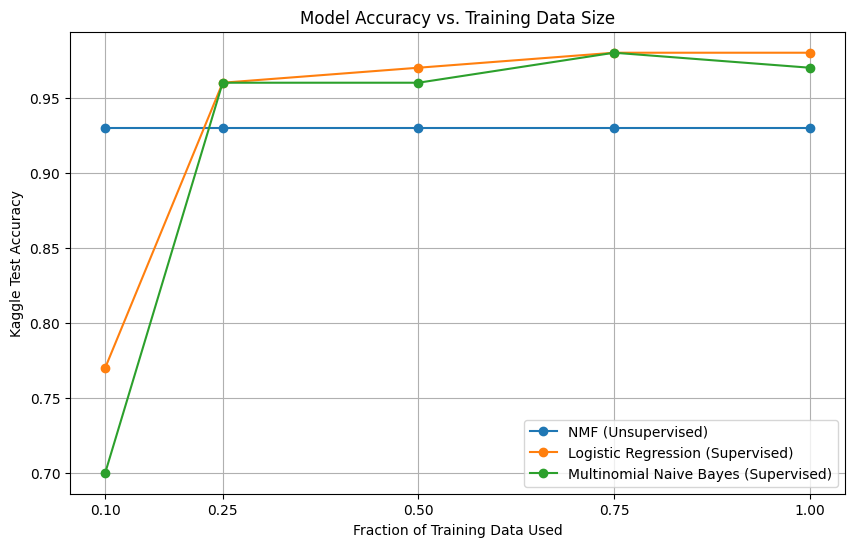

In [56]:
# --- Plotting the results (after we've manually collected scores from Kaggle) ---
log_reg_accuracies = [0.77, 0.96, 0.97, 0.98, 0.98]
mnb_accuracies = [0.70, 0.96, 0.96, 0.98, 0.97] 
nmf_accuracies = [0.93, 0.93, 0.93, 0.93, 0.93] 

plt.figure(figsize=(10, 6))
plt.plot(data_fractions, nmf_accuracies, marker='o', label='NMF (Unsupervised)')
plt.plot(data_fractions, log_reg_accuracies, marker='o', label='Logistic Regression (Supervised)')
plt.plot(data_fractions, mnb_accuracies, marker='o', label='Multinomial Naive Bayes (Supervised)')
plt.title('Model Accuracy vs. Training Data Size')
plt.xlabel('Fraction of Training Data Used')
plt.ylabel('Kaggle Test Accuracy')
plt.xticks(data_fractions)
plt.grid(True)
plt.legend()
plt.show()

### Conclusion
- Supervised models (Logistic Regression and Multinomial Naive Bayes) generally perform better when sufficient training data is available (e.g., 25% or more in this case), achieving accuracies in the high 90%.

- Non-negative Matrix Factorization (unsupervised) shows stable performance regardless of the training data size, maintaining an accuracy around 93%. This suggests that while it doesn't reach the peak performance of supervised models with ample data, its performance is less dependent on the quantity of labeled training examples.

## References
- https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer
- Medium articles
- Stack Overflow threads
- Kaggle, Github and various other online resources
